University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2023  
Luigi Acerbi  

# Week 1 exercises

In [ ]:
# Useful imports
%matplotlib inline
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

## 1. Input ranges for overflow and underflow (4 pts)

i. Write a program to find the largest integer for which `exp()` over double precision floating point numbers (`float64`) returns a finite value.

ii. The logistic function $$ \phi(x) = \frac{1}{1 + \exp(-x)} $$ is often used to map the real line to probabilities in the range $(0, 1)$, for example in logistic regression. For real numbers, the equation $ \phi(x) = 1 $ has no solution, but the same is not true for floating point numbers on a computer. Write a program to determine the smallest integer $ x $ for which $ \phi(x) =_F 1$ when using double precision floating point (`float64`) arithmetic.

*Note*: "Write a program" means you should not try out all values manually, but program the computer to find the solution.

In [ ]:
import sys

def phi(x):
    return 1 / (1 + np.exp(-x))

# Biggest x s.t exp(x) < inf
x = 0
while(np.exp(x) != np.inf):
    x+=1
print(x)
print(np.exp(x))

# smallest x s.t phi(x) = 1
x = 0
while (phi(x) != 1):
    x += 1
    
print(x)
print(phi(x))


710
inf
37
1.0


/var/folders/32/38vlh0g54yq0mx_cl1lqgzhc0000gn/T/ipykernel_7097/3963640133.py:8: RuntimeWarning: overflow encountered in exp
  while(np.exp(x) != np.inf):
/var/folders/32/38vlh0g54yq0mx_cl1lqgzhc0000gn/T/ipykernel_7097/3963640133.py:11: RuntimeWarning: overflow encountered in exp
  print(np.exp(x))


## 2. Numerical computation of binomial probabilities (4 pts)

Write a computer program to compute sums of binomial probabilities:
$$ f(l, u, n, p) = \sum_{i=l}^u \binom{n}{i} p^i (1-p)^{n-i}. $$
Use it to compute:

i. $ f(0, 5, 10, 0.25) = \sum_{i=0}^{5} \binom{10}{i} 0.25^i 0.75^{10-i} $

ii. $ f(10, 20, 20, 0.25) = \sum_{i=10}^{20} \binom{20}{i} 0.25^i 0.75^{20-i} $

iii. $ f(40, 60, 100, 0.25) = \sum_{i=40}^{60} \binom{100}{i} 0.25^i 0.75^{100-i} $

iv. $ f(75, 100, 100, 0.25) = \sum_{i=75}^{100} \binom{100}{i} 0.25^i 0.75^{100-i} $

*Hint*: Remember to use log probabilities and `logsumexp` as appropriate.

In [ ]:
from functools import reduce
from scipy.special import binom, logsumexp

def f(l, u, n, p):
    arr = [binom(n, i) * (p**i) * ((1-p)**(n-i)) for i in range(l, u+1)]
    log_arr = np.log(arr)
    res = logsumexp(log_arr)
    # print(log_arr)
    print(np.exp(res))

#1
f(0, 5, 10, 0.25)
f(10, 20, 20, 0.25)
f(40, 60, 100, 0.25)
f(75, 100, 100, 0.25)


0.9802722930908201
0.013864416943761181
0.0006865922079343074
1.4350852738018013e-25


## 3. Numerical evaluation of multivariate normal probabilities (4 pts)

Consider the $d$-variate normal distribution $\mathcal{N}(x;\; \mu, \Sigma)$ with the log-probability density
$$ \ln p(x;\; \mu, \Sigma) = -\frac{d}{2} \ln(2 \pi) - \frac{1}{2} \ln |\det \Sigma| - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu). $$
Let $\mu = \begin{pmatrix}0 \\ 0\end{pmatrix}$, $\Sigma = \begin{pmatrix}2^2 & 2\rho \\ 2\rho & 1\end{pmatrix}$.

Evaluate the following log-probabilities:

i. $ \ln p( \begin{pmatrix}0 \\ 0\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.8$

ii. $ \ln p( \begin{pmatrix}0 \\ 0\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.999$

iii. $ \ln p( \begin{pmatrix}1 \\ 1\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.999$

iv. $ \ln p( \begin{pmatrix}1 \\ 1\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = -0.999$

*Note*: `ln` denotes the logarithm in natural base (for us it is the same as `log`, per our usual notational convention).

In [6]:
import numpy as np

mu = np.array([0, 0])

def sig(p):
    return [[4, 2*p], [2*p, 1]]

def det_sig(p):
    return 4 - (4*p*p)

d = 2
def lnp(x,p):
    return -(d/2)*np.log(2*np.pi) - (1/2)*np.log(np.abs(det_sig(p))) - (1/2)*(np.transpose(x-mu) @ np.linalg.inv(sig(p)) @ (x - mu))

print(lnp(np.array([0, 0]), 0.8))
print(lnp(np.array([0, 0]), 0.999))
print(lnp(np.array([1, 1]), 0.999))
print(lnp(np.array([1, 1]), -0.999))

-2.0201986232033
0.5765298647626533
-62.204860830584956
-561.9547357680534


## 4. Rejection sampling of Beta(2, 3) (4 pts)

Write a program to draw samples from the $\text{Beta(2, 3)}$ distribution
$ p(x) = 12 x (1-x)^2, \quad 0 \le x \le 1 $  
using the uniform distribution on the interval $(0, 1)$ as the proposal distribution $q(x)$.

Remember that you need to find a constant $M$ such that $p(x) \le M q(x)$ for all $x$. Plotting the function $p(x)/q(x)$ is a good way to start looking for one.

Plot a normed histogram of your samples together with the density to check that they match.

Draw at least 10000 samples from the distribution and report your estimate of $ \mathbb{E}[x^5] $ for $ x \sim \mathrm{Beta}(2, 3)$.

*Note*: Please report the actual value you obtain to Moodle, not your guess of the true value. Values within the expected Monte Carlo error will be accepted as correct.

*Hint for evaluating the expectation* $\mathbb{E}[x^5]$: assuming we have samples $x_i \sim p(x), i = 1, \dots, n$ following the distribution $p(x)$, we can compute a simple Monte Carlo approximation of the expectation of an arbitrary function $g(x)$ as
$$ \mathbb{E}_p[g(x)] \approx \frac{1}{n} \sum_{i=1}^n g(x_i), \qquad \text{ for } x_i \sim p(x).$$

0.047492956763560204


(array([0.06073329, 0.15735444, 0.22360893, 0.36716035, 0.33955431,
        0.44997847, 0.48310572, 0.59076928, 0.61561472, 0.71499647,
        0.64874197, 0.7343207 , 0.87511151, 0.95516903, 0.97173265,
        0.98001447, 0.97173265, 1.21742642, 1.18153857, 1.14289011,
        1.12356588, 1.30024455, 1.30852636, 1.2698779 , 1.46588079,
        1.35821723, 1.46312019, 1.54593831, 1.49072623, 1.45207777,
        1.61219281, 1.68120792, 1.56250194, 1.6729261 , 1.61495342,
        1.55422013, 1.75022302, 1.72813819, 1.6729261 , 1.61771402,
        1.83856235, 1.79439268, 1.70605335, 1.7391806 , 1.87721081,
        1.83580175, 1.82475933, 1.83028054, 1.83580175, 1.75850483,
        1.83304114, 1.77506846, 1.7391806 , 1.70881396, 1.69501094,
        1.77230785, 1.7391806 , 1.63427765, 1.77506846, 1.69225033,
        1.67568671, 1.66464429, 1.61771402, 1.79439268, 1.75574423,
        1.70605335, 1.62047462, 1.66464429, 1.58734737, 1.56802315,
        1.62323523, 1.43827475, 1.48244442, 1.55

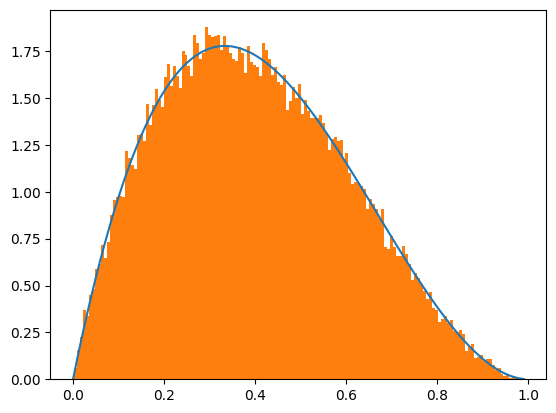

In [ ]:
def p(x):
    return 12*x*((1-x)**2)

x = np.arange(0, 1, 1e-2)
plt.plot(x, p(x))
M = 1.8

samples = []
for _ in range(10**5):
    y = np.random.uniform()
    u = np.random.uniform()
    if (u < p(y)/M):
        samples.append(y)

expected = np.mean(np.array(samples)**5)
print(expected)

plt.hist(samples, density=True, bins=150)



## 5. Rejection sampling of a Gaussian with Laplace  (4 pts)

Consider the standard $\text{Laplace}(0, 1)$ distribution defined by:
$$ q(x) = 1/2 \exp(- | x | ),$$ 
and the standard normal distribution defined by
$$p(x) = \frac{1}{\sqrt{2 \pi}} \exp\left( - \frac{1}{2} x^2 \right).$$
For both the Laplace and normal distribution, $x \in (-\infty, \infty)$.

1. Write a program to draw samples from the $\text{Laplace}(0, 1)$ distribution. (*Hint*: transformation considered on Lecture 2.) Test your program by comparing the normed histogram of the samples with the density.
2. Design a method to draw samples from the standard normal using the standard Laplace distribution as the proposal. (*Hint*: you need to find a constant $M$ such that $p(x) \le M q(x)$ for all $x$. Plotting the function $p(x)/q(x)$ is again useful for looking for one.)
3. Use 10000 samples to compute the expectation $ E[x^4] $ for $ x $ following the standard normal distribution.
4. Assume the underlying uniform random generator uses full 53 bits of precision of `float64` and produces random numbers in the range $[2^{-53}, 1]$, that is the smallest number $u$ that can be generated is $2^{-53}$. Considering the same setup as above, what is the largest value the rejection sampling method can generate, if it were executed for long enough? 

Hints for part 5.4:
- You need to check that the algorithm can both generate an extreme value, and accept it.
- What's the equation for accepting a value in rejection sampling? In particular, the fact that $u$ cannot be smaller than $2^{-53}$ implies that there are some values of $x$ that you will never be able to accept. Figure out the maximum $x$ that you can accept!
- You can use the same $M$ that you used in part 5.2 (as long as you chose a reasonable $M$, the answer will be valid).

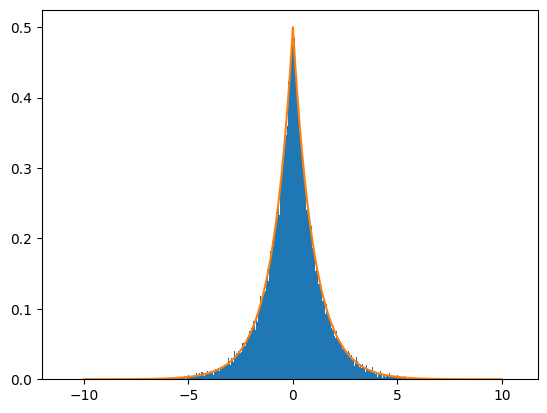

In [ ]:
def q(x):
    return 0.5*np.exp(-np.abs(x))

def Q_min_1(p):
    return np.log(2*p) if p < 0.5 else -np.log(2*(1-p))

def p(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-(1/2)*(x**2))

#### 5.1 ####
samples = []
for _ in range(10**5):
    y = np.random.uniform()
    samples.append(Q_min_1(y))
    
plt.hist(samples, bins=1000, density=True)
x = np.arange(-10, 10, 1e-3)
plt.plot(x, q(x))


2.997659812812986


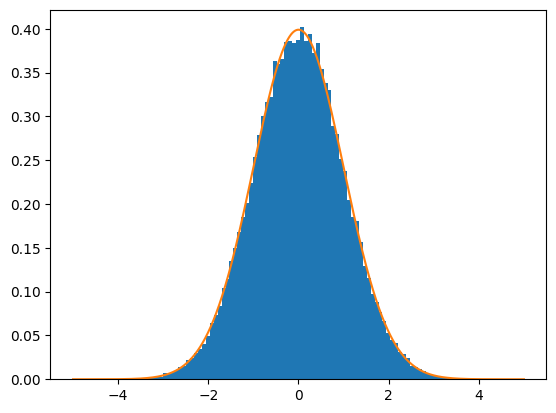

In [ ]:
#### 5.2 ####

# From plotting s.t p(x) < 1.4*q(x)
M = 1.4
samples = []
for _ in range(10**5):
    y = Q_min_1(np.random.uniform())
    u = np.random.uniform()
    if (u < p(y)/(q(y)*M)):
        samples.append(y)

plt.hist(samples, bins=100, density=True)
x = np.arange(-5, 5, 1e-3)
plt.plot(x, p(x))

#### 5.3 ###
expected = (np.array(samples)**4).mean()
print(expected)

In [ ]:
#### 5.4 ###